In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

## 5.2 Imperfect-information extensive-form games

So far in this chapter we have assumed that agents have complete knowledge of the state of play at each decision. This is inherent in the tree-like structure, where at each node an agent knows exactly what has come before. In reality this is not often the case, and so we need to introduce the idea of an imperfect-information game. 

### 5.2.1 Definition

In an imperfect-information extensive-form game an agents decisions might sometimes be grouped together to represent a lack of information. 

Consider the prisoners-dilemma. The problem cannot be captured in a perfect-information extensive-form representation, as this would imply player 2 has knowledge of player 1's action, which they don't. In order to convey that player 2 is uncertain about what player 1 has done, we can use a dashed line to link the states after play 1's action:

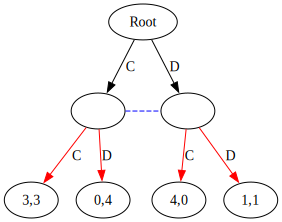

In [2]:
graph1 = Digraph()
graph1.node('Root', 'Root')
graph1.node('A', '')
graph1.node('B', '')
graph1.edge('Root', 'A','C',color="black")
graph1.edge('Root', 'B','D',color="black")
graph1.edge('A', 'B','',color="blue",style="dashed",dir="none")
with graph1.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('A')
    same_rank.node('B')
graph1.node('C', '3,3')
graph1.node('D', '0,4')
graph1.edge('A', 'C','C',color="red")
graph1.edge('A', 'D','D',color="red")
graph1.node('E', '4,0')
graph1.node('F', '1,1')
graph1.edge('B', 'E','C',color="red")
graph1.edge('B', 'F','D',color="red")
display(graph1)

We are essentially saying that the decision at both nodes needs to be the same. We call these collections of nodes 'information sets'. The definition of an information set says that the actions the player can take are the same at each node in the set, along with the probabilities of taking those actions. 

### 5.2.2 Strategies and equilibria

A pure strategy is then just a decision about what to do at each information set. In the normal-form version of the game we could represent this using all nodes, but just removing certain combinations. For instance, in the above case we have 4 possible combinations of decision for player 2 CC,CD,DC,DD (what to do if player 1 cooperates, what to do if player 1 defects). But when we link the decisions in an information set we are essentially removing options CD and DC. There is a slight twist around behavioural strategies though. 

Imperfect-information games are very expressive, and any normal-form game has an imperfect-information equilvalent, and vice versa. In the case of the prisoner's dilemma there is a pure strategy equilibrium at DD, but as with normal-form games this is not always the case.

One unique thing we can do with the imperfect-information extensive-form game is define 'behavioural strategies'. In the normal-form game we could define a mixed strategy as any combination of pure strategies. In the extensive-form we can define a behavioural strategy as a randomisation within an information set. Thus a mixed strategy is just a combination of probability vectors for each information set. What this means is that when an agent returns to the information set they get to roll the dice again. 

Consider the following twist on the prisoners-dilemma:

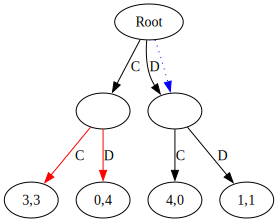

In [3]:
graph2 = Digraph()
graph2.node('Root', 'Root')
graph2.node('A', '')
graph2.node('B', '')
graph2.edge('Root', 'A','C',color="black")
graph2.edge('Root', 'B','D',color="black")
graph2.edge('Root', 'B','',color="blue",style="dotted")
graph2.node('C', '3,3')
graph2.node('D', '0,4')
graph2.edge('A', 'C','C',color="red")
graph2.edge('A', 'D','D',color="red")
graph2.node('E', '4,0')
graph2.node('F', '1,1')
graph2.edge('B', 'E','C',color="black")
graph2.edge('B', 'F','D',color="black")
display(graph2)

In this example player 1 is also making the decision for what player 2 does if player 1 defects, but is constrained in that they need to apply the same strategy as in the root node. If you just consider the pure strategies the option of going DC will never come up. In the normal-form equivalent DC is a pure strategy for player 1 that is removed as an option. This game above has an equilibrium where player 1 goes DD.

With a behavioural strategy we can instead make the decision of player 1 above random. This essentially brings back the option of specific mixed strategies. For instance, player 1 can play C with probability $\frac{1}{2}$. If the result is $C$ player 1 gets nothing. But if the result is $D$ player 1 then can re-roll the dice. If D again player 1 gets 1. But if C player 1 gets 4. The expected return of this strategy is then $1.25$, which is better than just $1$ for DD! Strategies like the one above are ignored in the normal-form game version because the pure strategy is eliminated. At the same time mixed strategy games can include many strategies that cannot be expressed by any behavioural strategy. Consider any case where two different information sets are correlated (e.g., consider a game where you play either AA or BB, this cannot be expressed as 2 behavioural strategies).

There is a set of games for which the expressive power of both approaches is the same. These are called the **perfect recall** games. Intuitively a player has perfect recall if the action they take at each information set is deterministic given they know their current information set. I.e., if there are two nodes in an information set it must be that there is a single possible sequence of actions they took at each information set to get to the current state. Consider:

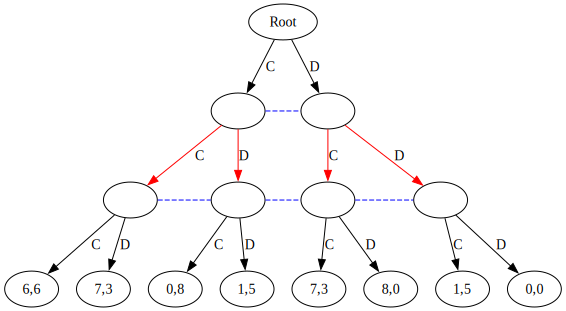

In [4]:
graph3 = Digraph()
graph3.node('Root', 'Root')
graph3.node('A', '')
graph3.node('B', '')
graph3.edge('Root', 'A','C',color="black")
graph3.edge('Root', 'B','D',color="black")
graph3.edge('A', 'B','',color="blue",style="dashed",dir="none")
with graph3.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('A')
    same_rank.node('B')
graph3.node('C', '')
graph3.node('D', '')
graph3.edge('A', 'C','C',color="red")
graph3.edge('A', 'D','D',color="red")
graph3.node('E', '')
graph3.node('F', '')
graph3.edge('B', 'E','C',color="red")
graph3.edge('B', 'F','D',color="red")
graph3.edge('C', 'D','',color="blue",style="dashed",dir="none")
graph3.edge('D', 'E','',color="blue",style="dashed",dir="none")
graph3.edge('E', 'F','',color="blue",style="dashed",dir="none")
with graph3.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('C')
    same_rank.node('D')
    same_rank.node('E')
    same_rank.node('F')
graph3.node('G', '6,6')
graph3.node('H', '7,3')
graph3.edge('C', 'G','C',color="black")
graph3.edge('C', 'H','D',color="black")
graph3.node('I', '0,8')
graph3.node('J', '1,5')
graph3.edge('D', 'I','C',color="black")
graph3.edge('D', 'J','D',color="black")
graph3.node('K', '7,3')
graph3.node('L', '8,0')
graph3.edge('E', 'K','C',color="black")
graph3.edge('E', 'L','D',color="black")
graph3.node('M', '1,5')
graph3.node('N', '0,0')
graph3.edge('F', 'M','C',color="black")
graph3.edge('F', 'N','D',color="black")
display(graph3)

This game is NOT perfect recall. When player 1 does their second turn they don't know what they did in the first. The action was not deterministic. They don't know whether they played C or D. We also can't convert some mixed strategies to behavioural ones. E.g., say you have a mixed strategy that player 1 does CDC with probability $0.7$ and CCD with $0.3$. This would require at the second stage that p(D)p(C)=0.7 and p(C)p(D)=0.3, which can't be true. On the other hand...

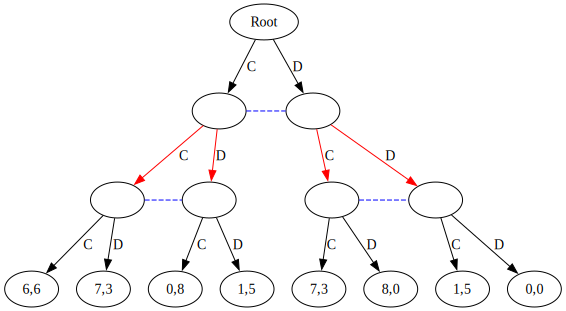

In [6]:
graph4 = Digraph()
graph4.node('Root', 'Root')
graph4.node('A', '')
graph4.node('B', '')
graph4.edge('Root', 'A','C',color="black")
graph4.edge('Root', 'B','D',color="black")
graph4.edge('A', 'B','',color="blue",style="dashed",dir="none")
with graph4.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('A')
    same_rank.node('B')
graph4.node('C', '')
graph4.node('D', '')
graph4.edge('A', 'C','C',color="red")
graph4.edge('A', 'D','D',color="red")
graph4.node('E', '')
graph4.node('F', '')
graph4.edge('B', 'E','C',color="red")
graph4.edge('B', 'F','D',color="red")
graph4.edge('C', 'D','',color="blue",style="dashed",dir="none")
graph4.edge('E', 'F','',color="blue",style="dashed",dir="none")
with graph4.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('C')
    same_rank.node('D')
    same_rank.node('E')
    same_rank.node('F')
graph4.node('G', '6,6')
graph4.node('H', '7,3')
graph4.edge('C', 'G','C',color="black")
graph4.edge('C', 'H','D',color="black")
graph4.node('I', '0,8')
graph4.node('J', '1,5')
graph4.edge('D', 'I','C',color="black")
graph4.edge('D', 'J','D',color="black")
graph4.node('K', '7,3')
graph4.node('L', '8,0')
graph4.edge('E', 'K','C',color="black")
graph4.edge('E', 'L','D',color="black")
graph4.node('M', '1,5')
graph4.node('N', '0,0')
graph4.edge('F', 'M','C',color="black")
graph4.edge('F', 'N','D',color="black")
display(graph4)

This IS a game of perfect recall. When player 1 does their second action they don't know what player 2 did but do know what they did in the first step. The action was deterministic. Note: It could still be that the decision at the root node was probabilistic.

All perfect-information games are naturally games of perfect recall.

Behavioural strategies and mixed strategies are equivalent in a perfect recall game because we can decompose the probability of a pure strategy (e.g., CCD) into the behavioural strategies, and we can compose the probabilities of each behavioural strategy to get the probability of a pure strategy.

The book doesn't prove this (I imagine it is quite involved), so will leave as an exercise for another time!